In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

defense=pd.read_csv('four_factors_defense.csv')
defense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8314 entries, 0 to 8313
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8314 non-null   int64  
 1   Season      8314 non-null   int64  
 2   TeamName    8314 non-null   object 
 3   eFGPct      8314 non-null   float64
 4   RankeFGPct  8314 non-null   int64  
 5   TOPct       8314 non-null   float64
 6   RankTOPct   8314 non-null   int64  
 7   ORPct       8314 non-null   float64
 8   RankORPct   8314 non-null   int64  
 9   FTRate      8314 non-null   float64
 10  RankFTRate  8314 non-null   int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 714.6+ KB


Drop rankings by year, and index column; these ranking are not relevant since we have compiled data from every year since 2002

In [2]:
defense=defense.drop(columns=['Unnamed: 0','RankeFGPct','RankTOPct','RankORPct','RankFTRate'],axis=1)

Combine 'Season' and 'TeamName' columns so we can more easily identify teams

In [3]:
defense['Team/Year']=defense['Season'].astype(str) + ' ' +defense['TeamName']

defense=defense.drop(columns=['Season','TeamName'], axis=1)


In [4]:
defense.head()

,eFGPct,TOPct,ORPct,FTRate,Team/Year
0,53.568030,23.406179,30.112721,52.711703,2025 Abilene Christian
1,54.512106,15.831910,28.934010,34.776229,2025 Air Force
2,49.000740,17.665107,28.846154,34.196891,2025 Akron
3,46.088539,13.717892,29.952153,30.927835,2025 Alabama
4,54.434500,20.866170,37.826685,47.274207,2025 Alabama A&M


In [5]:
numerical=defense[['eFGPct','TOPct','FTRate','ORPct']].copy(deep=True)
for col in numerical:
    statistic,p_value=shapiro(numerical[col])
    if p_value >0.05:
        print(f'p-value for {col} is normally distributed') 
    else:
        print(f'p-value for {col} is not normally distributed')

p-value for eFGPct is not normally distributed
p-value for TOPct is not normally distributed
p-value for FTRate is not normally distributed
p-value for ORPct is not normally distributed


/Users/michaelgriffin/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8314.
  res = hypotest_fun_out(*samples, **kwds)


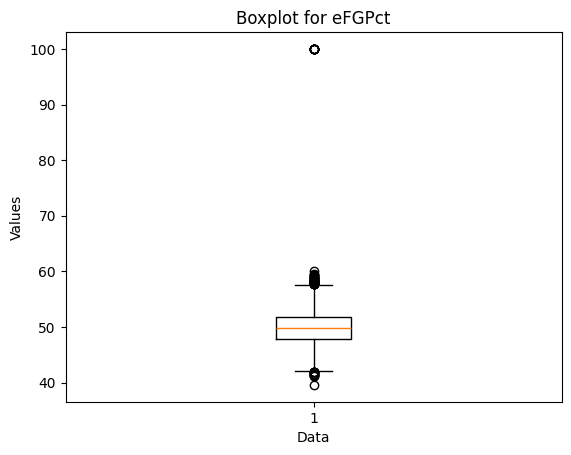

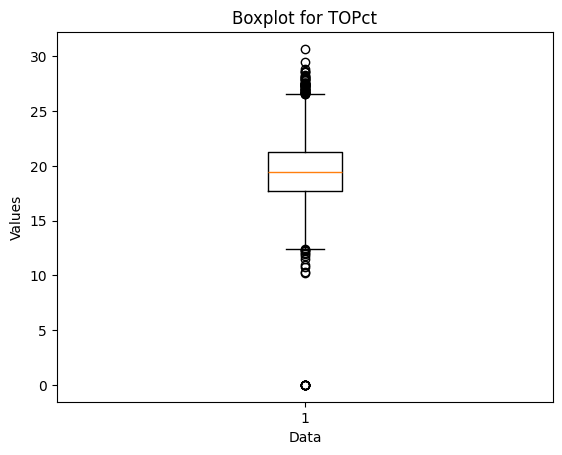

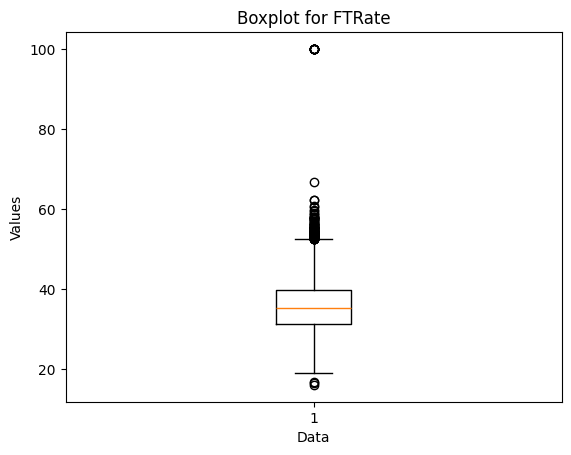

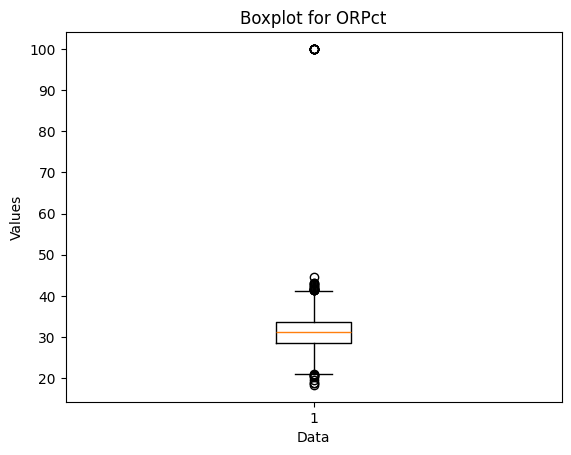

In [6]:
for col in numerical:
    fig, ax=plt.subplots()
    ax.boxplot(numerical[col])
    ax.set_title(f'Boxplot for {col}')
    ax.set_xlabel('Data')
    ax.set_ylabel('Values')
plt.show()

Identifying Minimum and Maximum values for four factors, and the number of occurrences of each minimum and maximum in the dataset

In [7]:
for col in numerical:
    max=defense[col].max()
    print(f'maximum value for {col}:', max)
    max_rows=defense[col].value_counts()[max]
    print(f'occurrences for max in {col}:', max_rows)
    max_ids=defense[defense[col]==max]
    print(f'teams with maximum value for {col}:',max_ids)
    
for col in numerical:
    min=defense[col].min()
    print(f'minimum value for {col}:', min)
    min_rows=defense[col].value_counts()[min]
    print(f'occurrences for min in {col}:', min_rows)
    min_ids=defense[defense[col]==min]
    print(f'teams with minimum value for {col}:',min_ids)

maximum value for eFGPct: 100.0
occurrences for max in eFGPct: 10
teams with maximum value for eFGPct:       eFGPct  TOPct  ORPct  FTRate                    Team/Year
1470   100.0    0.0  100.0   100.0         2021 Bethune Cookman
1477   100.0    0.0  100.0   100.0                   2021 Brown
1505   100.0    0.0  100.0   100.0                2021 Columbia
1508   100.0    0.0  100.0   100.0                 2021 Cornell
1510   100.0    0.0  100.0   100.0               2021 Dartmouth
1556   100.0    0.0  100.0   100.0                 2021 Harvard
1609   100.0    0.0  100.0   100.0  2021 Maryland Eastern Shore
1674   100.0    0.0  100.0   100.0                    2021 Penn
1682   100.0    0.0  100.0   100.0               2021 Princeton
1802   100.0    0.0  100.0   100.0                    2021 Yale
maximum value for TOPct: 30.6673
occurrences for max in TOPct: 1
teams with maximum value for TOPct:        eFGPct    TOPct    ORPct   FTRate         Team/Year
7990  48.3791  30.6673  39.2193  

Because a small number of teams share the outliers across all columns except TO Rate (these Ivy League teams did not play in 2021, leading their percentages to sit on 0 or 100), we can drop the outliers.

In [8]:
defense=defense[defense['ORPct'] != 100]


In [9]:
defense.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8304 entries, 0 to 8313
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   eFGPct     8304 non-null   float64
 1   TOPct      8304 non-null   float64
 2   ORPct      8304 non-null   float64
 3   FTRate     8304 non-null   float64
 4   Team/Year  8304 non-null   object 
dtypes: float64(4), object(1)
memory usage: 389.2+ KB


Top and Bottom 20 visualizations for each 

In [23]:
defense.nlargest(10, 'eFGPct')

,eFGPct,TOPct,ORPct,FTRate,Team/Year
1497,60.125448,16.240167,37.931034,32.795699,2021 Chicago St.
2825,59.509746,15.046648,30.752212,36.089781,2018 USC Upstate
180,59.326019,14.793820,39.687055,39.498433,2025 Mississippi Valley St.
2278,59.316770,19.710789,32.776350,39.130435,2019 Incarnate Word
21,59.139375,15.182829,30.638298,34.272658,2025 Bellarmine
2557,59.095982,18.166219,34.572864,41.238839,2018 Chicago St.
3224,58.952600,17.249100,27.754680,46.167350,2016 UTSA
1678,58.870256,17.907277,30.769231,23.212710,2021 Portland
1370,58.853119,16.144192,27.203065,32.461435,2022 St. Thomas
4199,58.750000,19.456200,32.712500,49.679500,2014 Tennessee Martin


Bivariate Analysis-Pearson and Spearman Correlations 

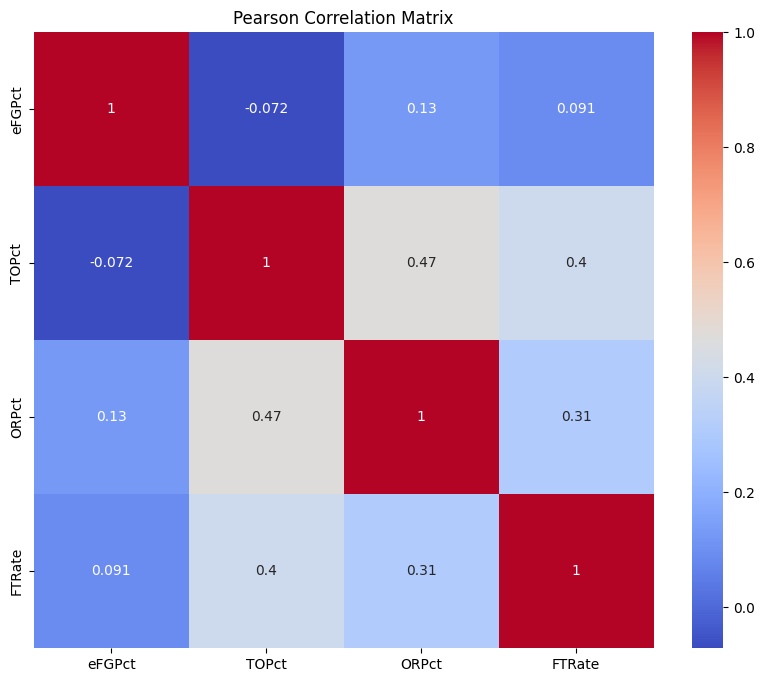

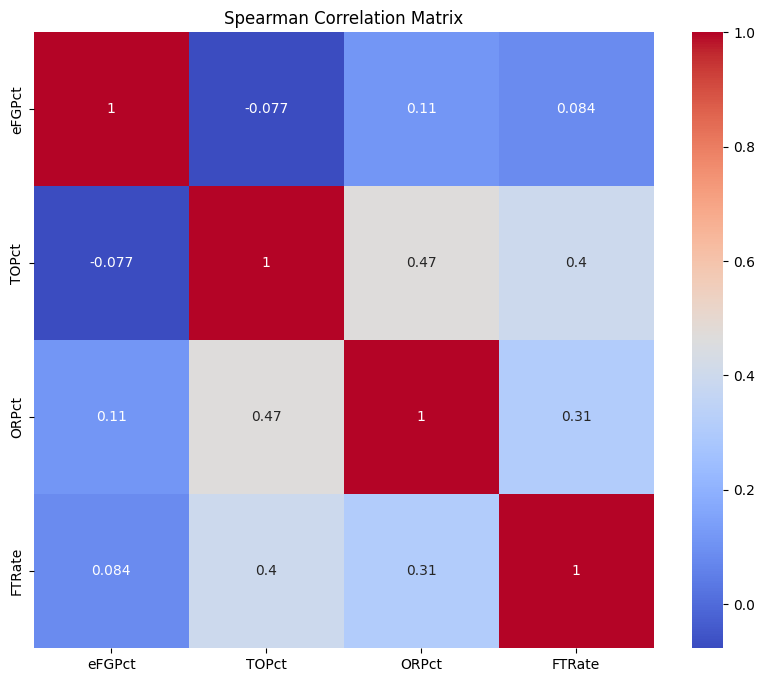

In [10]:
correlators=defense[['eFGPct','TOPct','ORPct','FTRate']].copy(deep=True)
pearson=correlators.corr(method='pearson')
spearman=correlators.corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(spearman, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Matrix')
plt.show()

Scatterplots for each variable

array([[<Axes: xlabel='eFGPct', ylabel='eFGPct'>,
        <Axes: xlabel='TOPct', ylabel='eFGPct'>,
        <Axes: xlabel='ORPct', ylabel='eFGPct'>,
        <Axes: xlabel='FTRate', ylabel='eFGPct'>],
       [<Axes: xlabel='eFGPct', ylabel='TOPct'>,
        <Axes: xlabel='TOPct', ylabel='TOPct'>,
        <Axes: xlabel='ORPct', ylabel='TOPct'>,
        <Axes: xlabel='FTRate', ylabel='TOPct'>],
       [<Axes: xlabel='eFGPct', ylabel='ORPct'>,
        <Axes: xlabel='TOPct', ylabel='ORPct'>,
        <Axes: xlabel='ORPct', ylabel='ORPct'>,
        <Axes: xlabel='FTRate', ylabel='ORPct'>],
       [<Axes: xlabel='eFGPct', ylabel='FTRate'>,
        <Axes: xlabel='TOPct', ylabel='FTRate'>,
        <Axes: xlabel='ORPct', ylabel='FTRate'>,
        <Axes: xlabel='FTRate', ylabel='FTRate'>]], dtype=object)

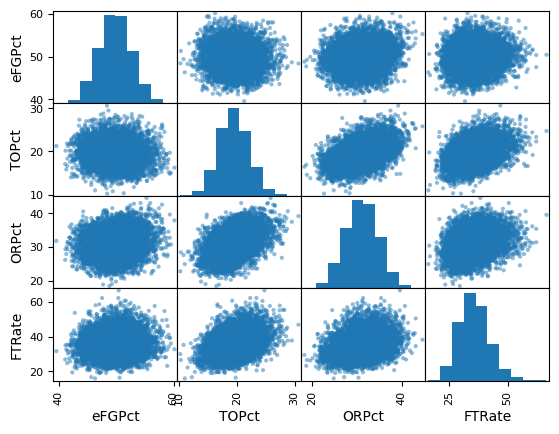

In [15]:
pd.plotting.scatter_matrix(correlators)